Loading images from /work/ab0995/a270225/dane/forest_fire/Training and Validation/fire
Loading images from /work/ab0995/a270225/dane/forest_fire/Training and Validation/nofire
Loaded 1832 images from /work/ab0995/a270225/dane/forest_fire/Training and Validation
Loading images from /work/ab0995/a270225/dane/forest_fire/Testing/fire
Loading images from /work/ab0995/a270225/dane/forest_fire/Testing/nofire
Loaded 68 images from /work/ab0995/a270225/dane/forest_fire/Testing


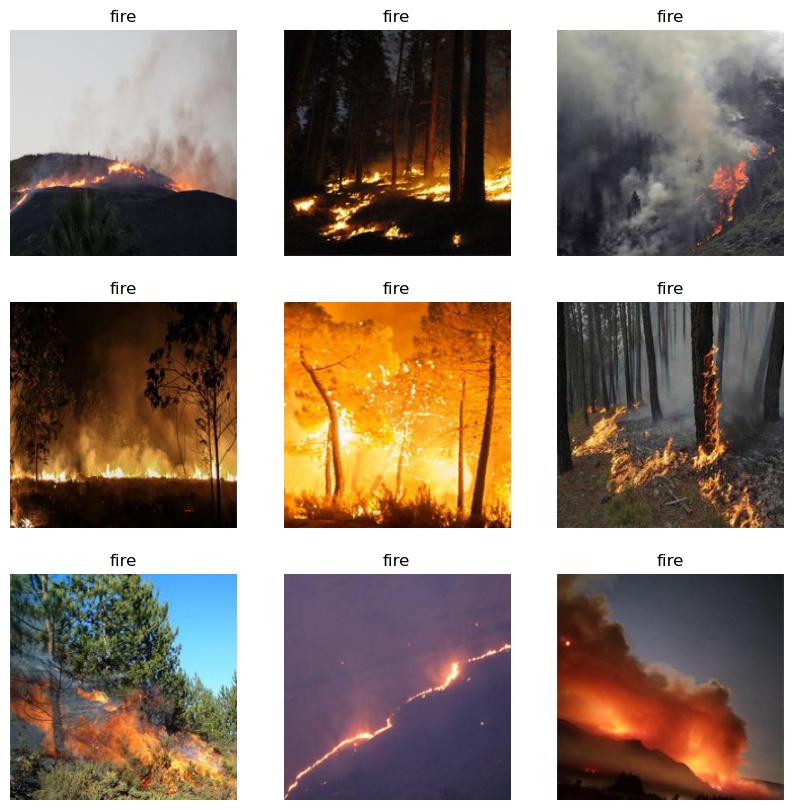

In [1]:
import os
from glob import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

data_dir = "/work/ab0995/a270225/dane/forest_fire"  
train_dir = os.path.join(data_dir, 'Training and Validation')
test_dir = os.path.join(data_dir, 'Testing')


def load_images_from_folder(folder):
    images = []
    labels = []
    for label in ['fire', 'nofire']:
        path = os.path.join(folder, label)
        print(f"Loading images from {path}")  
        for filename in glob(os.path.join(path, '*.jpg')):
            img = cv2.imread(filename)
            if img is not None:
                img = cv2.resize(img, (224, 224))  
                images.append(img)
                labels.append(label)
    print(f"Loaded {len(images)} images from {folder}")  
    return np.array(images), np.array(labels)

train_images, train_labels = load_images_from_folder(train_dir)
test_images, test_labels = load_images_from_folder(test_dir)

if train_images.size == 0:
    print("No training images loaded. Check the directory paths and image files.")
else:
    
    def display_sample_images(images, labels):
        plt.figure(figsize=(10, 10))
        for i in range(min(9, len(images))):  
            plt.subplot(3, 3, i+1)
            plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
            plt.title(labels[i])
            plt.axis('off')
        plt.show()

    display_sample_images(train_images, train_labels)


In [ ]:
#EAD

In [3]:
# Liczenie liczby obrazów w każdej klasie
train_fire_count = np.sum(train_labels == 'fire')
train_nofire_count = np.sum(train_labels == 'nofire')
test_fire_count = np.sum(test_labels == 'fire')
test_nofire_count = np.sum(test_labels == 'nofire')

In [4]:

print(f'liczba fire w train i val {train_fire_count}')
print(f'liczba nofire w train i val {train_nofire_count}')
print(f'liczba fire w test {test_fire_count}')
print(f'liczba nofire w test {test_nofire_count}')

liczba fire w train i val 928
liczba nofire w train i val 904
liczba fire w test 22
liczba nofire w test 46


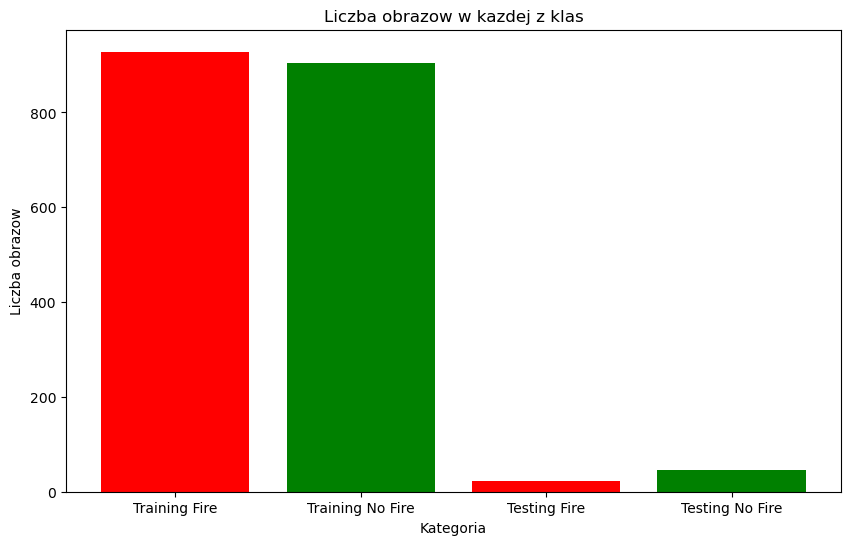

In [5]:
#Wizualizacja rozkładu liczby obrazów w klasach
#Dane do wykresu
labels = ['Training Fire', 'Training No Fire', 'Testing Fire', 'Testing No Fire']
counts = [train_fire_count, train_nofire_count, test_fire_count, test_nofire_count]

# Tworzenie wykresu słupkowego
plt.figure(figsize=(10, 6))
plt.bar(labels, counts, color=['red', 'green', 'red', 'green'])
plt.xlabel('Kategoria')
plt.ylabel('Liczba obrazow')
plt.title('Liczba obrazow w kazdej z klas')
plt.show()

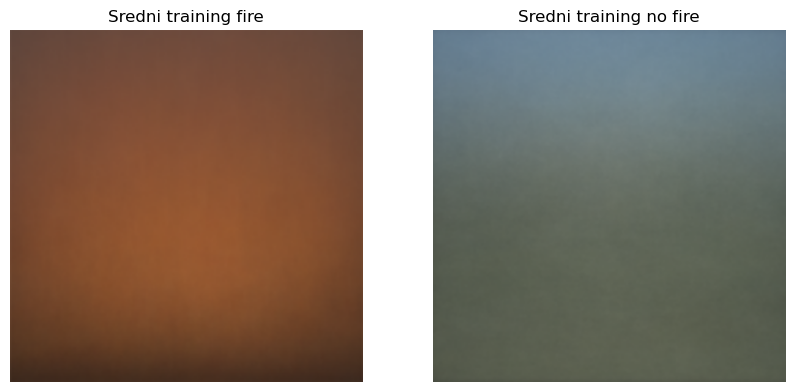

In [6]:
#Średnie obrazy dla każdej klasy
def calculate_average_image(images):
    # Obliczanie średniego obrazu
    average_image = np.mean(images, axis=0).astype(np.uint8)
    return average_image

# Średnie obrazy
average_train_fire = calculate_average_image(train_images[train_labels == 'fire'])
average_train_nofire = calculate_average_image(train_images[train_labels == 'nofire'])

# Wyświetlanie średnich obrazów
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(average_train_fire, cv2.COLOR_BGR2RGB))
plt.title('Sredni training fire')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(average_train_nofire, cv2.COLOR_BGR2RGB))
plt.title('Sredni training no fire')
plt.axis('off')

plt.show()


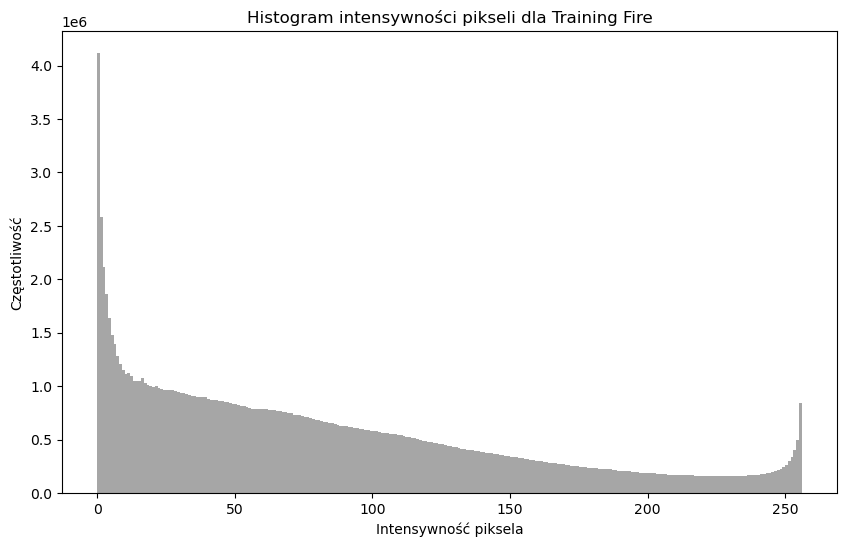

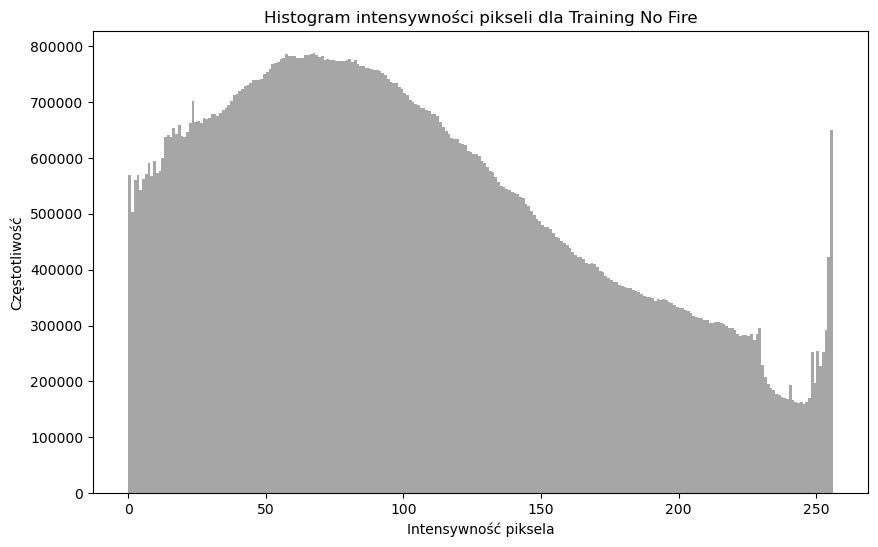

In [8]:
#histogram intensywonosci pikseli
def plot_histogram(images, title):
    pixel_values = images.ravel()
    plt.figure(figsize=(10, 6))
    plt.hist(pixel_values, bins=256, range=(0, 256), color='gray', alpha=0.7)
    plt.title(f'Histogram intensywności pikseli dla {title}')
    plt.xlabel('Intensywność piksela')
    plt.ylabel('Częstotliwość')
    plt.show()

# Histogramy intensywności pikseli
plot_histogram(train_images[train_labels == 'fire'], 'Training Fire')
plot_histogram(train_images[train_labels == 'nofire'], 'Training No Fire')

In [14]:
#vgg16

/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-wuuo72/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-wuuo72/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Train Loss: 0.4940, Train Accuracy: 0.7836, Validation Loss: 0.3048, Validation Accuracy: 0.9591
Epoch 2/10, Train Loss: 0.2652, Train Accuracy: 0.9433, Validation Loss: 0.2008, Validation Accuracy: 0.9728
Epoch 3/10, Train Loss: 0.1982, Train Accuracy: 0.9495, Validation Loss: 0.1557, Validation Accuracy: 0.9755
Epoch 4/10, Train Loss: 0.1626, Train Accuracy: 0.9597, Validation Loss: 0.1315, Validation Accuracy: 0.9782
Epoch 5/10, Train Loss: 0.1404, Train Accuracy: 0.9638, Validation Loss: 0.1158, Validation Accuracy: 0.9782
Epoch 6/10, Train Loss: 0.1339, Train Accuracy: 0.9631, Validation Loss: 0.1042, Validation Accuracy: 0.9755
Epoch 7/10, Train Loss: 0.1217, Train Accuracy: 0.9652, Validation Loss: 0.0957, Validation Accuracy: 0.9755
Epoch 8/10, Train Loss: 0.1161, Train Accuracy: 0.9659, Validation Loss: 0.0895, Validation Accuracy: 0.9755
Epoch 9/10, Train Loss: 0.1088, Train Accuracy: 0.9652, Validation Loss: 0.0849, Validation Accuracy: 0.9837
Epoch 10/10, Train 

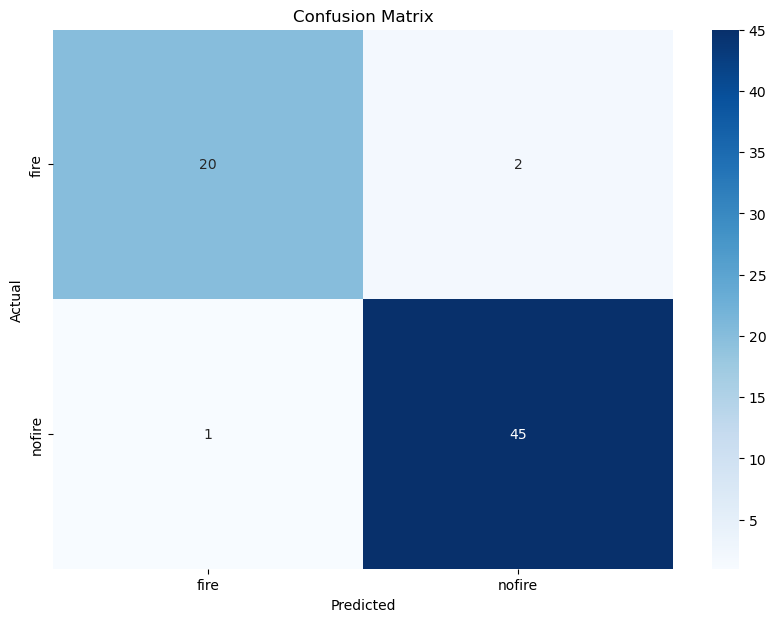

              precision    recall  f1-score   support

        fire       0.95      0.91      0.93        22
      nofire       0.96      0.98      0.97        46

    accuracy                           0.96        68
   macro avg       0.95      0.94      0.95        68
weighted avg       0.96      0.96      0.96        68

ROC-AUC: 0.9911067193675889


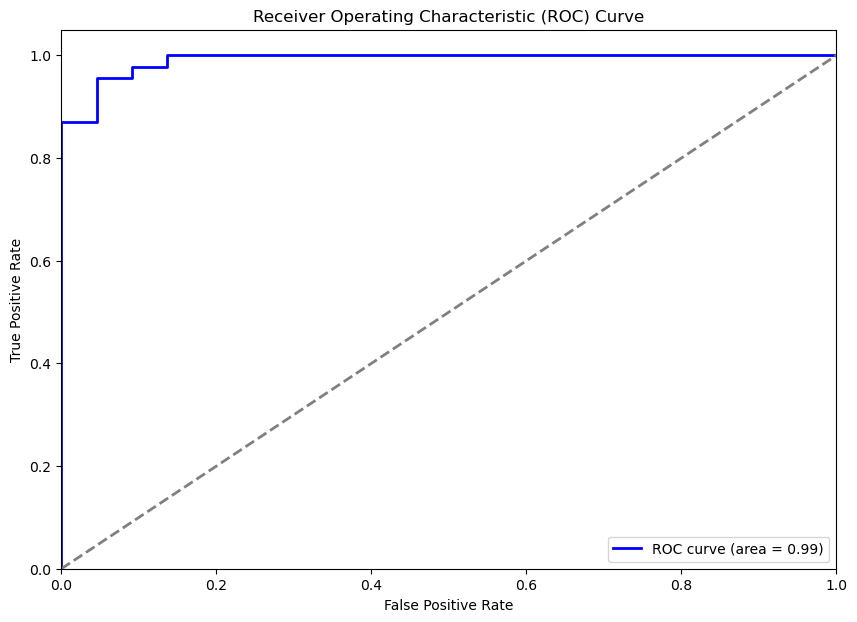

In [13]:
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from torchvision import models, transforms

def load_images_with_labels(folder):
    images = []
    labels = []
    for label in ['fire', 'nofire']:
        path = os.path.join(folder, label)
        for filename in glob(os.path.join(path, '*.jpg')):
            img = cv2.imread(filename)
            if img is not None:
                img = cv2.resize(img, (224, 224)) 
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)


data_dir = "/work/ab0995/a270225/dane/forest_fire"
train_dir = os.path.join(data_dir, 'Training and Validation')
test_dir = os.path.join(data_dir, 'Testing')

all_images, all_labels = load_images_with_labels(train_dir)
test_images, test_labels = load_images_with_labels(test_dir)

label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)
test_labels_encoded = label_encoder.transform(test_labels)

train_images, val_images, train_labels, val_labels = train_test_split(
    all_images, all_labels_encoded, test_size=0.2, stratify=all_labels_encoded, random_state=42
)


class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_dataset = CustomDataset(train_images, train_labels, transform=transform)
val_dataset = CustomDataset(val_images, val_labels, transform=transform)
test_dataset = CustomDataset(test_images, test_labels_encoded, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model = models.vgg16(pretrained=True)

# zamrazanie warstw
for param in model.parameters():
    param.requires_grad = False

# modyfikacja klasyfikatora
model.classifier[6] = nn.Linear(4096, 2)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier[6].parameters(), lr=0.0001)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

num_epochs = 10
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_epoch_accuracy = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, "
          f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_accuracy:.4f}")

print("Training complete")

model.eval()
all_labels = []
all_predictions = []
all_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
        all_probs.extend(torch.softmax(outputs, dim=1).cpu().numpy())


test_accuracy = accuracy_score(all_labels, all_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

#miary jakosci

cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print(classification_report(all_labels, all_predictions, target_names=label_encoder.classes_))


y_true = np.array(all_labels)
y_pred_proba = np.array(all_probs)

roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1])
print(f'ROC-AUC: {roc_auc}')

fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1])
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


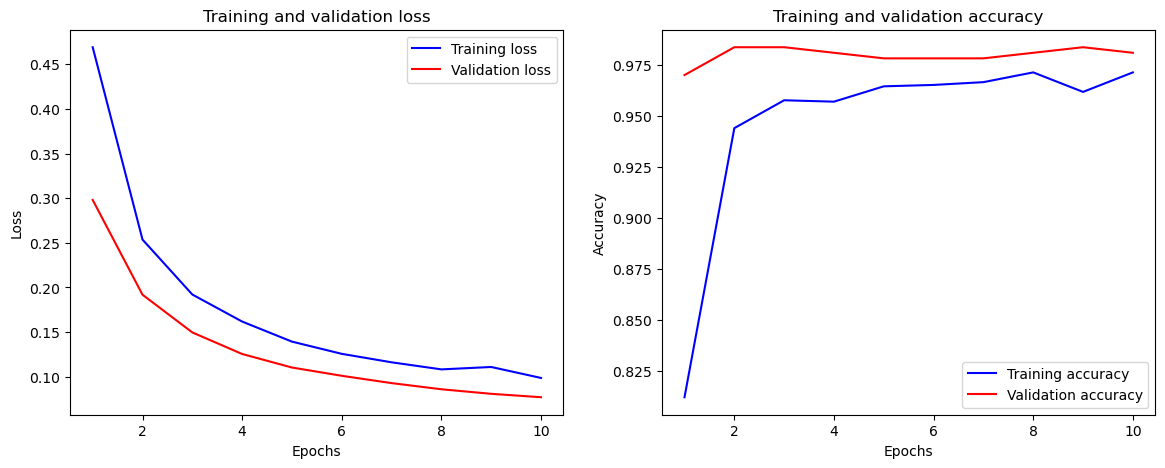

In [14]:
import matplotlib.pyplot as plt

def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(14, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, 'b', label='Training loss')
    plt.plot(epochs, val_losses, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracies, 'r', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)


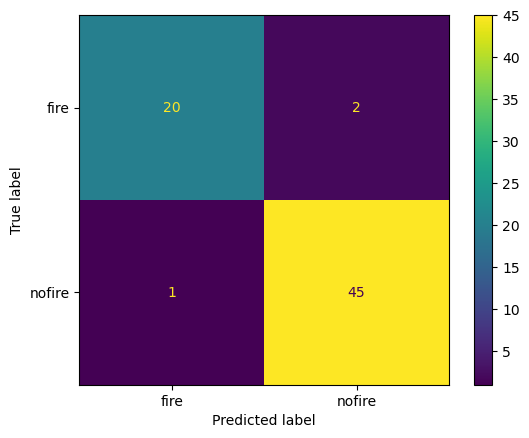

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

model.eval()
all_labels = []
all_preds = []
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.show()


In [ ]:
#tuning

Training with learning rate 0.001, batch size 16, and number of epochs 10


/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-wuuo72/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/sw/spack-levante/mambaforge-22.9.0-2-Linux-x86_64-wuuo72/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Training with learning rate 0.001, batch size 16, and number of epochs 20
Training with learning rate 0.001, batch size 32, and number of epochs 10
Training with learning rate 0.001, batch size 32, and number of epochs 20
Training with learning rate 0.0001, batch size 16, and number of epochs 10
Training with learning rate 0.0001, batch size 16, and number of epochs 20
Training with learning rate 0.0001, batch size 32, and number of epochs 10
Epoch 20/20, Train Loss: 0.0285, Train Accuracy: 0.9891, Validation Loss: 0.0274, Validation Accuracy: 0.9864
Training complete
Test Accuracy: 0.9706


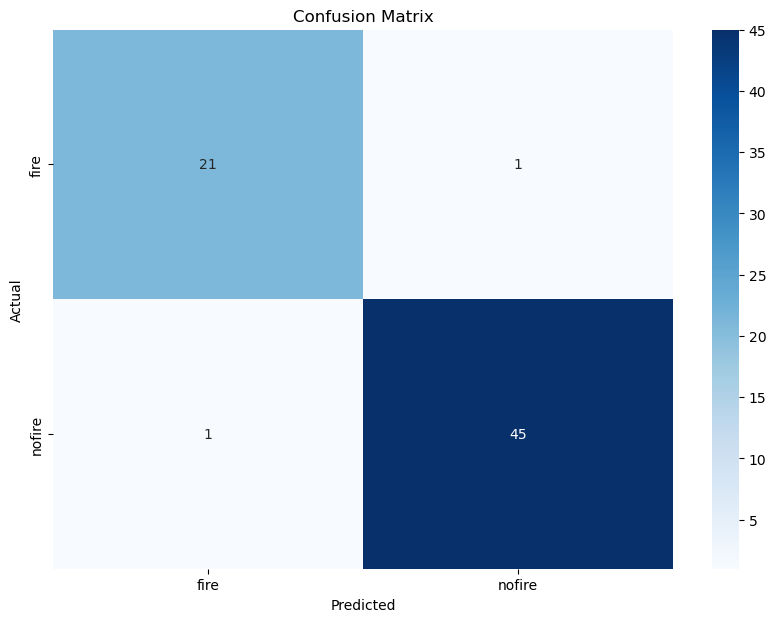

              precision    recall  f1-score   support

        fire       0.95      0.95      0.95        22
      nofire       0.98      0.98      0.98        46

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

ROC-AUC: 0.9871541501976285


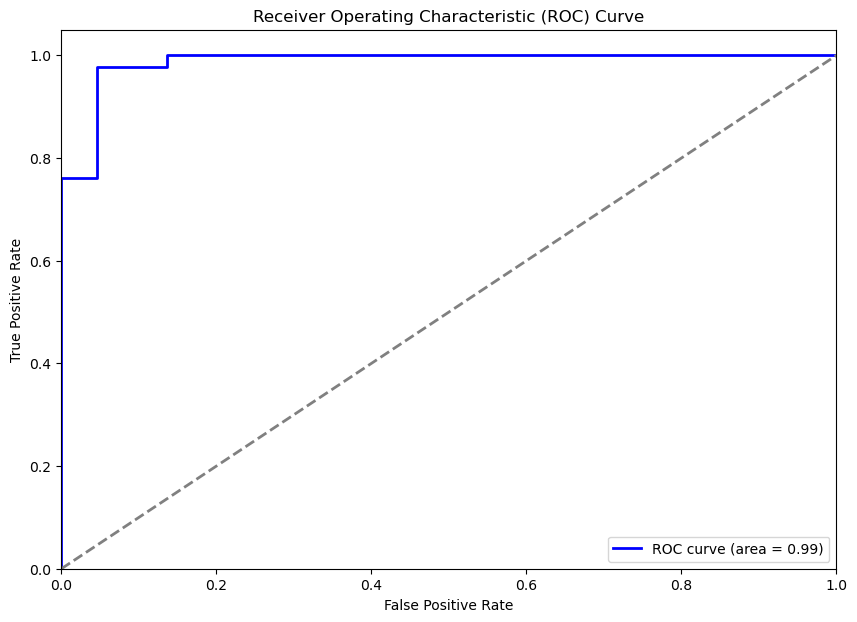

In [21]:
import os
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
from torchvision import models, transforms


def load_images_with_labels(folder):
    images = []
    labels = []
    for label in ['fire', 'nofire']:
        path = os.path.join(folder, label)
        for filename in glob(os.path.join(path, '*.jpg')):
            img = cv2.imread(filename)
            if img is not None:
                img = cv2.resize(img, (224, 224)) 
                images.append(img)
                labels.append(label)
    return np.array(images), np.array(labels)


data_dir = "/work/ab0995/a270225/dane/forest_fire"
train_dir = os.path.join(data_dir, 'Training and Validation')
test_dir = os.path.join(data_dir, 'Testing')

all_images, all_labels = load_images_with_labels(train_dir)
test_images, test_labels = load_images_with_labels(test_dir)

label_encoder = LabelEncoder()
all_labels_encoded = label_encoder.fit_transform(all_labels)
test_labels_encoded = label_encoder.transform(test_labels)

train_images, val_images, train_labels, val_labels = train_test_split(
    all_images, all_labels_encoded, test_size=0.2, stratify=all_labels_encoded, random_state=42
)

class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_dataset = CustomDataset(train_images, train_labels, transform=transform)
val_dataset = CustomDataset(val_images, val_labels, transform=transform)
test_dataset = CustomDataset(test_images, test_labels_encoded, transform=transform)

# zakresy hiperparametrow
learning_rates = [0.001, 0.0001]
batch_sizes = [16, 32]
num_epochs = [10, 20]

best_val_accuracy = 0
best_hyperparams = {}

# Mmanualny tuning
for lr in learning_rates:
    for batch_size in batch_sizes:
        for epochs in num_epochs:
            print(f"Training with learning rate {lr}, batch size {batch_size}, and number of epochs {epochs}")
            
            train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
            val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
            
            model = models.vgg16(pretrained=True)

            for param in model.parameters():
                param.requires_grad = False

            model.classifier[6] = nn.Linear(4096, 2)

            criterion = nn.CrossEntropyLoss()
            optimizer = optim.Adam(model.classifier[6].parameters(), lr=lr)

            device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
            model.to(device)
            
            for epoch in range(epochs):
                model.train()
                running_loss = 0.0
                correct = 0
                total = 0

                for inputs, labels in train_loader:
                    inputs, labels = inputs.to(device), labels.to(device)

                    optimizer.zero_grad()
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    loss.backward()
                    optimizer.step()

                    running_loss += loss.item() * inputs.size(0)
                    _, predicted = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()

                epoch_loss = running_loss / len(train_loader.dataset)
                epoch_accuracy = correct / total

                model.eval()
                val_running_loss = 0.0
                val_correct = 0
                val_total = 0

                with torch.no_grad():
                    for inputs, labels in val_loader:
                        inputs, labels = inputs.to(device), labels.to(device)
                        outputs = model(inputs)
                        loss = criterion(outputs, labels)
                        val_running_loss += loss.item() * inputs.size(0)
                        _, predicted = torch.max(outputs, 1)
                        val_total += labels.size(0)
                        val_correct += (predicted == labels).sum().item()

                val_epoch_loss = val_running_loss / len(val_loader.dataset)
                val_epoch_accuracy = val_correct / val_total

                if val_epoch_accuracy > best_val_accuracy:
                    best_val_accuracy = val_epoch_accuracy
                    best_hyperparams = {'learning_rate': lr, 'batch_size': batch_size, 'num_epochs': epochs}

print(f"Best Hyperparameters: {best_hyperparams}, Best Validation Accuracy: {best_val_accuracy:.4f}")

# wybranie najlepszych hiperparametrow
batch_size = best_hyperparams['batch_size']
learning_rate = best_hyperparams['learning_rate']
num_epochs = best_hyperparams['num_epochs']

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

model = models.vgg16(pretrained=True)
for param in model.parameters():
    param.requires_grad = False

model.classifier[6] = nn.Linear(4096, 2)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.classifier[6].parameters(), lr=learning_rate)
model.to(device)

train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = correct / total
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    val_epoch_loss = val_running_loss / len(val_loader.dataset)
    val_epoch_accuracy = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_accuracy)

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, "
          f"Validation Loss: {val_epoch_loss:.4f}, Validation Accuracy: {val_epoch_accuracy:.4f}")

print("Training complete")

model.eval()
all_labels = []
all_predictions = []
all_probs = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())
        all_probs.extend(torch.softmax(outputs, dim=1).cpu().numpy())

test_accuracy = accuracy_score(all_labels, all_predictions)
print(f"Test Accuracy: {test_accuracy:.4f}")

#miary jakosci
cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(all_labels, all_predictions, target_names=label_encoder.classes_))

y_true = np.array(all_labels)
y_pred_proba = np.array(all_probs)

roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1])
print(f'ROC-AUC: {roc_auc}')

fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1])
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
#customowy cnn, tutaj testowalam fold validation w ramach strojenie hiperparametrow

Loading images from /work/ab0995/a270225/dane/forest_fire/Training and Validation/fire
Loading images from /work/ab0995/a270225/dane/forest_fire/Training and Validation/nofire
Loaded 1832 images from /work/ab0995/a270225/dane/forest_fire/Training and Validation
Loading images from /work/ab0995/a270225/dane/forest_fire/Testing/fire
Loading images from /work/ab0995/a270225/dane/forest_fire/Testing/nofire
Loaded 68 images from /work/ab0995/a270225/dane/forest_fire/Testing


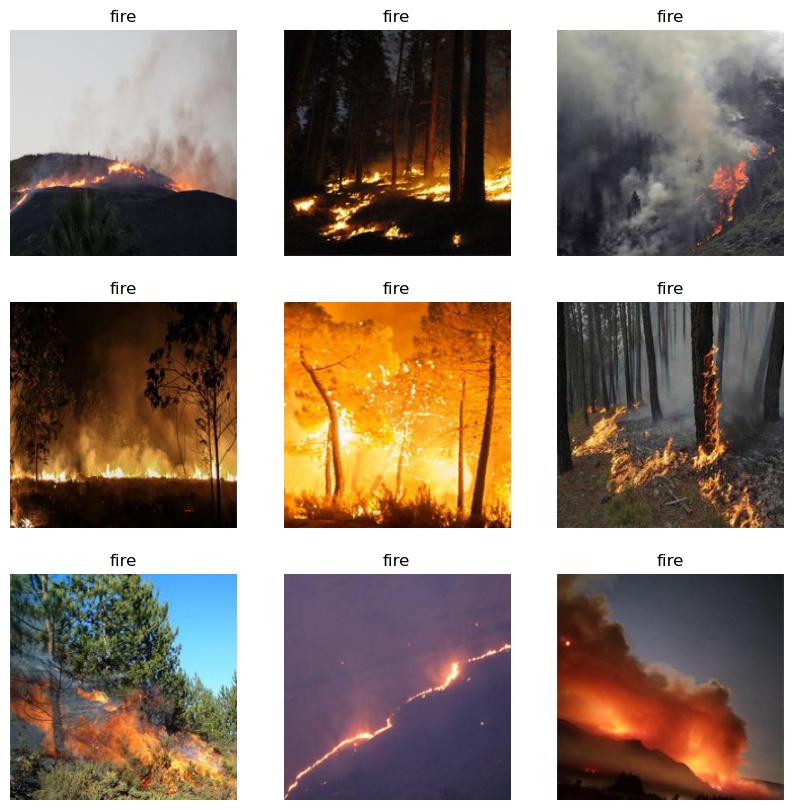

Training with learning rate 0.001 and batch size 16
Epoch 1, Train Loss: 0.3567834597678207, Validation Loss: 0.12831910634818283, Validation Accuracy: 96.45776566757493%
Epoch 2, Train Loss: 0.18616887427481782, Validation Loss: 0.2223426304433657, Validation Accuracy: 94.55040871934605%
Epoch 3, Train Loss: 0.14843038896493532, Validation Loss: 0.12827886662283994, Validation Accuracy: 96.73024523160763%
Epoch 4, Train Loss: 0.15263594072767656, Validation Loss: 0.1559223393180772, Validation Accuracy: 94.27792915531334%
Epoch 5, Train Loss: 0.1076380074095062, Validation Loss: 0.10936261510031055, Validation Accuracy: 96.45776566757493%
Epoch 6, Train Loss: 0.08867066700970652, Validation Loss: 0.10360559108970768, Validation Accuracy: 97.00272479564033%
Epoch 7, Train Loss: 0.06914753818937638, Validation Loss: 0.10609094759084932, Validation Accuracy: 97.27520435967303%
Epoch 8, Train Loss: 0.056890234717170446, Validation Loss: 0.114919107412393, Validation Accuracy: 95.367847411

In [13]:
import os
from glob import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset, random_split
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from torchvision import transforms

def load_images_from_folder(folder):
    images = []
    labels = []
    for label in ['fire', 'nofire']:
        path = os.path.join(folder, label)
        print(f"Loading images from {path}")  
        for filename in glob(os.path.join(path, '*.jpg')):
            img = cv2.imread(filename)
            if img is not None:
                img = cv2.resize(img, (224, 224))  
                images.append(img)
                labels.append(label)
    print(f"Loaded {len(images)} images from {folder}")  
    return np.array(images), np.array(labels)

data_dir = "/work/ab0995/a270225/dane/forest_fire"  
train_dir = os.path.join(data_dir, 'Training and Validation')
test_dir = os.path.join(data_dir, 'Testing')

train_images, train_labels = load_images_from_folder(train_dir)
test_images, test_labels = load_images_from_folder(test_dir)

def display_sample_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(min(9, len(images))):  
        plt.subplot(3, 3, i+1)
        plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        plt.title(labels[i])
        plt.axis('off')
    plt.show()

display_sample_images(train_images, train_labels)

label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels_encoded, test_size=0.2, stratify=train_labels_encoded, random_state=42
)

class CustomDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


train_dataset = CustomDataset(train_images, train_labels, transform=transform)
val_dataset = CustomDataset(val_images, val_labels, transform=transform)
test_dataset = CustomDataset(test_images, test_labels_encoded, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


class CustomCNN(nn.Module):
    def __init__(self):
        super(CustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 28 * 28, 512)
        self.fc2 = nn.Linear(512, 2)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 128 * 28 * 28)  # wyplaszczenie
        x = self.dropout(self.relu(self.fc1(x)))
        x = self.fc2(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ustawienia tuningu
learning_rates = [0.001, 0.0001]
batch_sizes = [16, 32]
best_val_accuracy = 0
best_hyperparams = {}

for lr in learning_rates:
    for batch_size in batch_sizes:
        print(f"Training with learning rate {lr} and batch size {batch_size}")
        
        model = CustomCNN().to(device)
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=lr)
        
        # dokladne sledzenie straty
        train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

        for epoch in range(10): 
            model.train()
            running_loss = 0.0
            for inputs, labels in train_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
            avg_train_loss = running_loss / len(train_loader)
            
            
            model.eval()
            val_loss = 0.0
            correct = 0
            total = 0
            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    _, predicted = torch.max(outputs.data, 1)
                    total += labels.size(0)
                    correct += (predicted == labels).sum().item()
            avg_val_loss = val_loss / len(val_loader)
            val_accuracy = 100 * correct / total

            print(f'Epoch {epoch + 1}, Train Loss: {avg_train_loss}, Validation Loss: {avg_val_loss}, Validation Accuracy: {val_accuracy}%')

            if val_accuracy > best_val_accuracy:
                best_val_accuracy = val_accuracy
                best_hyperparams = {'learning_rate': lr, 'batch_size': batch_size}

print(f"Best Hyperparameters: {best_hyperparams}, Best Validation Accuracy: {best_val_accuracy}%")

# trening najlepszych hiperparametrow
model = CustomCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=best_hyperparams['learning_rate'])
train_loader = DataLoader(train_dataset, batch_size=best_hyperparams['batch_size'], shuffle=True)

# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []

for fold, (train_idx, val_idx) in enumerate(kf.split(train_dataset)):
    print(f"FOLD {fold + 1}")
    train_subset = torch.utils.data.Subset(train_dataset, train_idx)
    val_subset = torch.utils.data.Subset(train_dataset, val_idx)

    train_loader = DataLoader(train_subset, batch_size=best_hyperparams['batch_size'], shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=best_hyperparams['batch_size'], shuffle=False)
    
    for epoch in range(10):  
        model.train()
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_accuracy = 100 * correct / total
        print(f'Fold {fold + 1}, Epoch {epoch + 1}, Validation Accuracy: {val_accuracy}%')
        
    fold_accuracies.append(val_accuracy)

print(f'K-Fold Cross-Validation Accuracy: {np.mean(fold_accuracies)}%')

# testowanie z najlepszym modelem 
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total}%')


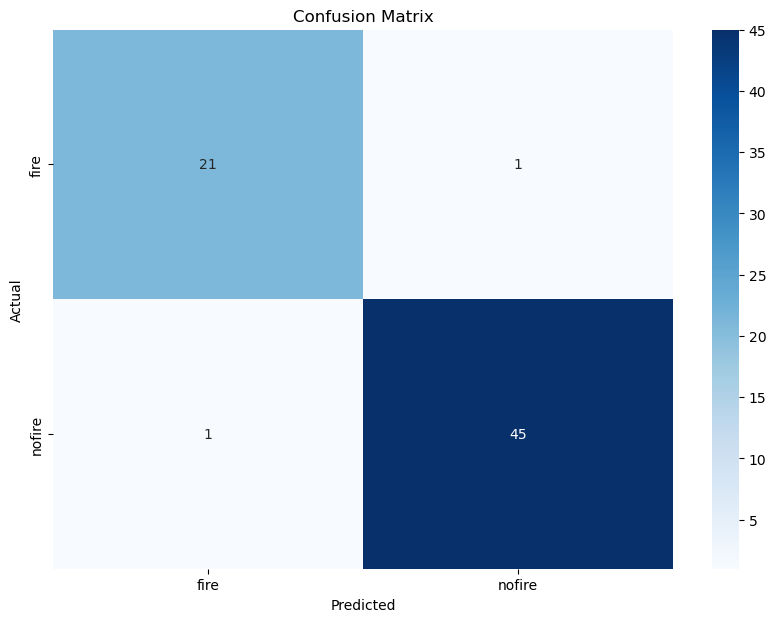

              precision    recall  f1-score   support

        fire       0.95      0.95      0.95        22
      nofire       0.98      0.98      0.98        46

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68

ROC-AUC: 0.9693675889328063


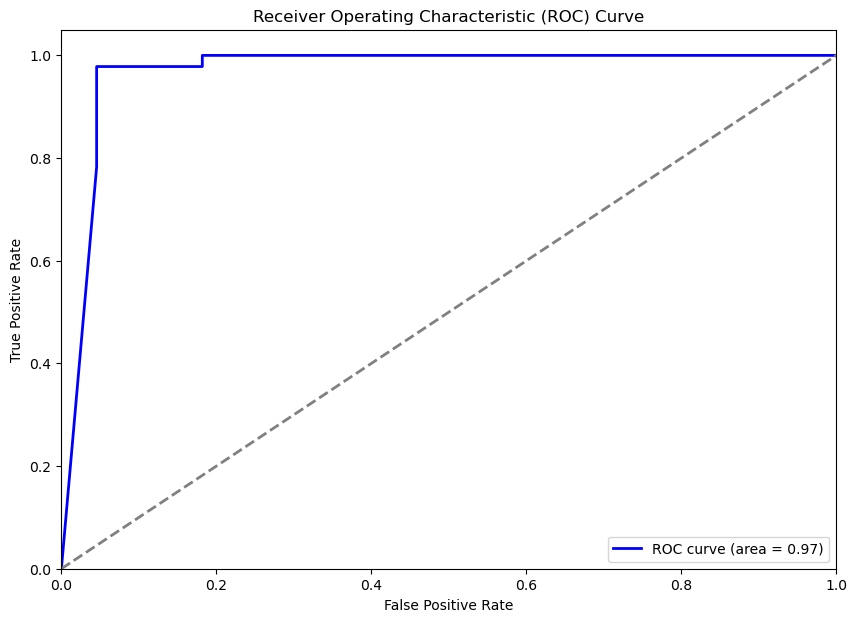

Test Accuracy: 97.06%


In [15]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score
import seaborn as sns

#miary jakosci 

cm = confusion_matrix(all_labels, all_predictions)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(all_labels, all_predictions, target_names=label_encoder.classes_))

y_true = np.array(all_labels)
y_pred_proba = np.array(all_probs)

roc_auc = roc_auc_score(y_true, y_pred_proba[:, 1])
print(f'ROC-AUC: {roc_auc}')

fpr, tpr, _ = roc_curve(y_true, y_pred_proba[:, 1])
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()